In [74]:
import time
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import model_selection

In [2]:
data = pd.read_pickle('subscribers')
data.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [3]:
engage = pd.read_pickle('engagement')
engage

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [4]:
c = engage.groupby('subid').mean()
c

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
subid,,,,,,,
20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000
20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000
20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333
20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895
20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000
29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000
29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000


In [5]:
engage.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [6]:
cs = pd.read_pickle('customer_service_reps')
cs

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [7]:
#customer segmentation

In [8]:
df_1 = data[['subid', 'age','male_TF','weekly_consumption_hour','num_ideal_streaming_services']]
df_1['engagement'] = False
df_1 = df_1.join(pd.DataFrame(0, columns=['payment_period',
                                          'app_opens', 
                                          'num_videos_completed',
                                          'num_videos_rated'], index=df_1.index))
df_1

<ipython-input-8-65594e461a85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['engagement'] = False


,subid,age,male_TF,weekly_consumption_hour,num_ideal_streaming_services,engagement,payment_period,app_opens,num_videos_completed,num_videos_rated
162502,21724479,NaN,False,NaN,NaN,False,0,0,0,0
380374,23383224,70.0,False,22.951579,NaN,False,0,0,0,0
496617,26844789,25.0,True,36.001186,1.951776,False,0,0,0,0
356799,29417030,30.0,False,20.051667,NaN,False,0,0,0,0
681701,26723159,28.0,False,22.951579,2.506384,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
509326,21434712,38.0,False,28.751405,1.905485,False,0,0,0,0
229587,25843074,49.0,False,27.301448,1.835189,False,0,0,0,0
281340,24799085,45.0,False,31.651317,NaN,False,0,0,0,0
87198,21308040,NaN,False,NaN,NaN,False,0,0,0,0


In [9]:
subid_list = list(df_1['subid'])
for i in c.index:
    if i in subid_list:
        index = df_1[df_1.subid == i].index.tolist()[0]
        df_1.at[index, 'engagement'] = True
        df_1.at[index, 'payment_period'] += c.at[i, 'payment_period']
        df_1.at[index, 'app_opens'] += c.at[i, 'app_opens']
        df_1.at[index, 'num_videos_completed'] += c.at[i, 'num_videos_completed']
        df_1.at[index, 'num_videos_rated'] += c.at[i, 'num_videos_rated']

In [10]:
df_1

,subid,age,male_TF,weekly_consumption_hour,num_ideal_streaming_services,engagement,payment_period,app_opens,num_videos_completed,num_videos_rated
162502,21724479,NaN,False,NaN,NaN,False,0,0,0,0
380374,23383224,70.0,False,22.951579,NaN,False,0,0,0,0
496617,26844789,25.0,True,36.001186,1.951776,True,0,1,6,0
356799,29417030,30.0,False,20.051667,NaN,False,0,0,0,0
681701,26723159,28.0,False,22.951579,2.506384,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
509326,21434712,38.0,False,28.751405,1.905485,True,0,1,2,0
229587,25843074,49.0,False,27.301448,1.835189,True,0,2,1,0
281340,24799085,45.0,False,31.651317,NaN,False,0,0,0,0
87198,21308040,NaN,False,NaN,NaN,False,0,0,0,0


In [11]:
df_copy = df_1.copy()
df_copy.drop(df_copy[np.isnan(df_copy['age'])].index, inplace=True)
df_copy.drop(df_copy[np.isnan(df_copy['weekly_consumption_hour'])].index, inplace=True)
df_copy.drop(df_copy[np.isnan(df_copy['num_ideal_streaming_services'])].index, inplace=True)
df_copy.drop(df_copy[df_copy['engagement'] == False].index, inplace=True)
index = [i for i in df_copy.index if (df_copy.loc[i]['age'] > 12) & (df_copy.loc[i]['age']<120)]
df_copy = df_copy.loc[index]
df_copy.drop(columns='engagement',axis = 1,inplace=True)
df_copy.drop(columns='subid',axis = 1,inplace=True)
df_copy

,age,male_TF,weekly_consumption_hour,num_ideal_streaming_services,payment_period,app_opens,num_videos_completed,num_videos_rated
496617,25.0,True,36.001186,1.951776,0,1,6,0
192823,61.0,False,20.051667,1.860289,0,0,4,0
315863,23.0,False,34.551230,1.870503,0,2,1,0
277565,57.0,False,28.751405,1.842940,0,2,3,0
377093,54.0,False,33.101274,1.867353,0,5,3,0
...,...,...,...,...,...,...,...,...
243775,44.0,False,27.301448,2.317104,0,1,1,0
378377,32.0,False,30.201361,1.968236,0,1,6,0
603751,43.0,False,24.401536,1.881068,0,2,3,0
509326,38.0,False,28.751405,1.905485,0,1,2,0


In [12]:
df_dummy = pd.get_dummies(df_copy, columns=['male_TF'])
df_dummy

,age,weekly_consumption_hour,num_ideal_streaming_services,payment_period,app_opens,num_videos_completed,num_videos_rated,male_TF_False,male_TF_True
496617,25.0,36.001186,1.951776,0,1,6,0,0,1
192823,61.0,20.051667,1.860289,0,0,4,0,1,0
315863,23.0,34.551230,1.870503,0,2,1,0,1,0
277565,57.0,28.751405,1.842940,0,2,3,0,1,0
377093,54.0,33.101274,1.867353,0,5,3,0,1,0
...,...,...,...,...,...,...,...,...,...
243775,44.0,27.301448,2.317104,0,1,1,0,1,0
378377,32.0,30.201361,1.968236,0,1,6,0,1,0
603751,43.0,24.401536,1.881068,0,2,3,0,1,0
509326,38.0,28.751405,1.905485,0,1,2,0,1,0


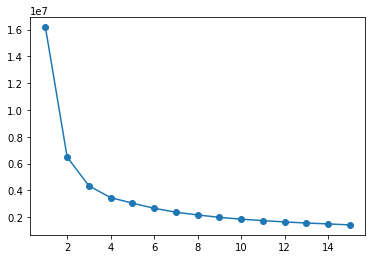

In [13]:
index = []
inertia = []
for i in range(15):
    model = KMeans(n_clusters=i+1)
    model.fit(df_dummy.loc[:,:])
    index.append(i+1)
    inertia.append(model.inertia_)
    
plt.plot(index, inertia, '-o')

In [14]:
kmeans_2 = KMeans(n_clusters=3).fit(df_dummy.loc[:,:].values)

k_2 = kmeans_2.cluster_centers_

pd_k_2 = pd.DataFrame(k_2, columns=df_dummy.columns)
pd_k_2.round(4)

,age,weekly_consumption_hour,num_ideal_streaming_services,payment_period,app_opens,num_videos_completed,num_videos_rated,male_TF_False,male_TF_True
0,62.2425,27.7131,1.9895,0.1058,1.5578,2.2896,0.0007,0.8699,0.1301
1,30.6088,28.0121,2.0058,0.0468,1.4974,2.5838,0.0004,0.8978,0.1022
2,46.4522,28.1455,2.0018,0.0772,1.4906,2.3980,0.0006,0.8814,0.1186


In [15]:
sample = df_dummy.loc[:,:].sample(n=200)

for index in sample.index:
    index_in_df = int(np.argwhere(df_dummy.index==index))
    sample.loc[index,'label'] = kmeans_2.labels_[index_in_df]
    
for index in pd_k_2.index:
    pd_k_2.loc[index,'label'] = 3 
    
sample = sample.append(pd_k_2, ignore_index=False)
sample

,age,weekly_consumption_hour,num_ideal_streaming_services,payment_period,app_opens,num_videos_completed,num_videos_rated,male_TF_False,male_TF_True,label
500872,32.000000,30.201361,1.854599,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.0
81414,52.000000,21.501623,1.956577,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,2.0
320177,30.000000,20.051667,1.854872,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.0
334594,61.000000,22.951579,1.939225,0.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.0
588769,56.000000,27.301448,1.887310,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
360230,68.000000,34.551230,1.880248,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.0
388308,54.000000,27.301448,1.952120,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.0
0,62.242542,27.713147,1.989501,0.105766,1.557841,2.289622,0.000738,0.869926,0.130074,3.0
1,30.608777,28.012097,2.005780,0.046815,1.497371,2.583771,0.000387,0.897789,0.102211,3.0


In [16]:
sample['label'].unique()

array([1., 2., 0., 3.])

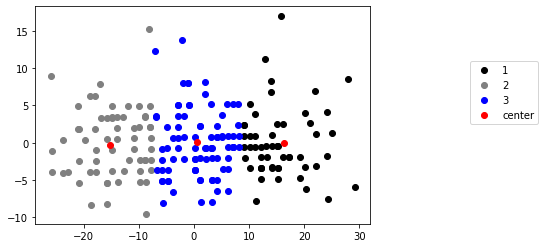

In [17]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(sample.iloc[:,:-1].values)

pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['label'] = sample['label'].values

ax = pos.loc[pos['label']==0]
plt.scatter(x=ax['X'], y=ax['Y'], color='black', label='1')
ax = pos.loc[pos['label']==1]
plt.scatter(x=ax['X'], y=ax['Y'], color='grey', label='2')
ax = pos.loc[pos['label']==2]
plt.scatter(x=ax['X'], y=ax['Y'], color='blue', label='3')
ax = pos.loc[pos['label']==3]
plt.scatter(x=ax['X'], y=ax['Y'], color='red', label='center')

plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=10)

In [18]:
# Budget Allocation

In [19]:
def time_trunc(timestr):
    time_m = timestr[0:4]+timestr[5:7]
    return time_m

In [20]:
channel_spend = pd.read_excel('advertising_spend_data.xlsx')
channel_spend.set_axis(channel_spend.iloc[1],axis=1, inplace=True)
channel_spend.drop([0,1], inplace=True)
for i in channel_spend.index:
    channel_spend.loc[i,'date'] = time_trunc(str(channel_spend.loc[i,'date']))
channel_spend = channel_spend.transpose()
channel_spend.set_axis(channel_spend.iloc[0],axis=1, inplace=True)
channel_spend.drop('date', inplace=True)
channel_spend

date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003
1,,,,,,,,,,
facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100
email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000
search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700
brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200
affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600
email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300
pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900
referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000


In [25]:
data['account_creation_date']

162502   2020-01-24 21:44:16
380374   2020-03-01 15:44:35
496617   2019-12-07 16:37:06
356799   2020-01-27 16:09:32
681701   2019-10-05 12:57:07
                 ...        
509326   2019-11-17 14:12:33
229587   2019-12-06 18:02:13
281340   2019-12-21 19:40:44
87198    2020-01-17 23:58:51
598241   2019-11-26 19:09:09
Name: account_creation_date, Length: 227628, dtype: datetime64[ns]

In [46]:
pd_channel = data[['attribution_technical', 'account_creation_date', 'discount_price', 'months_per_bill_period','join_fee']]
pd_channel['join_fee'] = pd_channel['join_fee'].fillna(0)
pd_channel.loc[:,'total_cost'] = pd_channel.loc[:,'discount_price']*pd_channel.loc[:,'months_per_bill_period']+pd_channel['join_fee']
pd_channel

<ipython-input-46-d2e9df87bda9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_channel['join_fee'] = pd_channel['join_fee'].fillna(0)
C:\Users\raymo\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\raymo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,attribution_technical,account_creation_date,discount_price,months_per_bill_period,join_fee,total_cost
162502,facebook,2020-01-24 21:44:16,4.5141,4,0.0000,18.0564
380374,facebook,2020-03-01 15:44:35,4.5141,4,0.3303,18.3867
496617,organic,2019-12-07 16:37:06,4.5141,4,0.1101,18.1665
356799,search,2020-01-27 16:09:32,4.5141,4,0.0367,18.0931
681701,discovery,2019-10-05 12:57:07,4.5141,4,0.0367,18.0931
...,...,...,...,...,...,...
509326,facebook,2019-11-17 14:12:33,4.5141,4,0.3303,18.3867
229587,google_organic,2019-12-06 18:02:13,4.5141,4,0.3303,18.3867
281340,facebook,2019-12-21 19:40:44,4.5141,4,0.0367,18.0931
87198,facebook,2020-01-17 23:58:51,4.5141,4,0.0000,18.0564


In [48]:
pd_channel['account_creation_date'].unique()

array(['2020-01-24T21:44:16.000000000', '2020-03-01T15:44:35.000000000',
       '2019-12-07T16:37:06.000000000', ...,
       '2019-12-21T19:40:44.000000000', '2020-01-17T23:58:51.000000000',
       '2019-11-26T19:09:09.000000000'], dtype='datetime64[ns]')

In [49]:
from datetime import datetime

In [50]:
for i in pd_channel.index:
    pd_channel['account_creation_date'][i] = datetime.strftime(pd_channel['account_creation_date'][i],'%Y%m')
pd_channel

<ipython-input-50-87d6ea96f775>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_channel['account_creation_date'][i] = datetime.strftime(pd_channel['account_creation_date'][i],'%Y%m')
C:\Users\raymo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\raymo\anaconda3\lib\site-packages\pandas\core\series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,attribution_technical,account_creation_date,discount_price,months_per_bill_period,join_fee,total_cost
162502,facebook,202001,4.5141,4,0.0000,18.0564
380374,facebook,202003,4.5141,4,0.3303,18.3867
496617,organic,201912,4.5141,4,0.1101,18.1665
356799,search,202001,4.5141,4,0.0367,18.0931
681701,discovery,201910,4.5141,4,0.0367,18.0931
...,...,...,...,...,...,...
509326,facebook,201911,4.5141,4,0.3303,18.3867
229587,google_organic,201912,4.5141,4,0.3303,18.3867
281340,facebook,201912,4.5141,4,0.0367,18.0931
87198,facebook,202001,4.5141,4,0.0000,18.0564


In [51]:
pd_channel

,attribution_technical,account_creation_date,discount_price,months_per_bill_period,join_fee,total_cost
162502,facebook,202001,4.5141,4,0.0000,18.0564
380374,facebook,202003,4.5141,4,0.3303,18.3867
496617,organic,201912,4.5141,4,0.1101,18.1665
356799,search,202001,4.5141,4,0.0367,18.0931
681701,discovery,201910,4.5141,4,0.0367,18.0931
...,...,...,...,...,...,...
509326,facebook,201911,4.5141,4,0.3303,18.3867
229587,google_organic,201912,4.5141,4,0.3303,18.3867
281340,facebook,201912,4.5141,4,0.0367,18.0931
87198,facebook,202001,4.5141,4,0.0000,18.0564


In [52]:
channel_list = channel_spend.index
date_list = channel_spend.columns

customer_set = {}
for d in date_list:
    customer_set[str(d)] = {x:0 for x in channel_list}
    
payment_set = {}
for d in date_list:
    payment_set[str(d)] = {x:0 for x in channel_list}

for i in pd_channel.index:
    if (pd_channel.loc[i, 'attribution_technical'] in channel_list)&(pd_channel.loc[i, 'account_creation_date'] in date_list):
        customer_set[pd_channel.loc[i,'account_creation_date']][pd_channel.loc[i,'attribution_technical']] += 1
        payment_set[pd_channel.loc[i,'account_creation_date']][pd_channel.loc[i,'attribution_technical']] += pd_channel.loc[i,'total_cost']

In [53]:
pd_customer_set = pd.DataFrame(customer_set)
pd_customer_set.loc[:,'total'] = np.sum(pd_customer_set.loc[:, col] for col in pd_customer_set.columns)
pd_customer_set

<ipython-input-53-6e5d77951bbb>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_customer_set.loc[:,'total'] = np.sum(pd_customer_set.loc[:, col] for col in pd_customer_set.columns)


,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,1318,10011,9855,6129,9489,12995,9288,6289,7988,6889,80251
email,309,3260,3092,2420,2305,2584,2677,2368,3168,3507,25690
search,108,1328,1939,1852,2333,2510,3770,4073,4300,3093,25306
brand sem intent google,197,2090,1895,1530,1602,2030,2443,2626,2346,1765,18524
affiliate,78,839,1903,1065,760,509,565,1074,1480,1621,9894
email_blast,109,1510,1902,1582,977,629,411,35,66,56,7277
pinterest,37,793,637,517,682,594,851,819,680,455,6065
referral,22,528,521,582,529,587,666,584,583,568,5170


In [54]:
pd_payment_set = pd.DataFrame(payment_set)
pd_payment_set.loc[:,'total'] = np.sum(pd_payment_set.loc[:, col] for col in pd_payment_set.columns)
pd_payment_set.round(2)

<ipython-input-54-96dbaa184de2>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_payment_set.loc[:,'total'] = np.sum(pd_payment_set.loc[:, col] for col in pd_payment_set.columns)


,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,23838.60,181121.95,178238.61,110829.38,171621.09,236250.23,169001.63,114588.81,145928.45,125802.54,1457221.28
email,5579.65,58866.69,55831.97,43698.58,41618.86,46661.66,48342.23,42764.27,57213.83,63371.10,463948.85
search,1953.47,24027.20,35072.94,33495.61,42205.51,45618.14,68653.55,74243.88,78586.66,56541.89,460398.86
brand sem intent google,3563.13,37813.44,34274.46,27671.62,28980.56,36847.17,44547.38,47957.21,42972.36,32286.42,336913.74
affiliate,1410.53,15173.84,34417.33,19255.72,13745.76,9239.78,10278.72,19573.17,27005.14,29577.01,179677.00
email_blast,1968.29,27260.80,34344.01,28566.55,17640.52,11358.25,7421.91,632.08,1192.53,1014.09,131399.03
pinterest,668.97,14347.68,11523.91,9352.33,12339.60,10819.49,15516.43,14936.42,12447.03,8325.87,110277.74
referral,397.90,9552.75,9422.58,10524.57,9566.22,10615.07,12076.32,10623.11,10619.92,10287.89,93686.33


In [55]:
pd_spend_set = pd.DataFrame(channel_spend)
pd_spend_set.loc[:,'total'] = np.sum(pd_spend_set.loc[:, col] for col in pd_spend_set.columns)
pd_spend_set

<ipython-input-55-38540a4c7e8d>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pd_spend_set.loc[:,'total'] = np.sum(pd_spend_set.loc[:, col] for col in pd_spend_set.columns)


date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
1,,,,,,,,,,,
facebook,84800,60000,52300,49000,51300,56100,51400,49000,49700,49100,552700
email,75000,75600,76100,75800,76000,75900,76100,75500,76600,78000,760600
search,17300,17300,18100,18900,21000,21400,32100,33600,30100,22700,232500
brand sem intent google,21400,21300,21300,21300,21400,21600,22200,22700,21700,21200,216100
affiliate,11900,12000,16300,16400,12200,11700,12100,14300,15000,17600,139500
email_blast,10500,29800,65900,73700,32300,9800,3500,300,300,300,226400
pinterest,5900,6000,6200,6000,6700,6300,7200,6700,6400,5900,63300
referral,6100,6600,6800,7400,7300,7300,8000,7400,6500,10000,73400


In [56]:
cac = pd_spend_set.div(pd_customer_set).round(2)
cac

date,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
1,,,,,,,,,,,
facebook,64.3399,5.99341,5.30695,7.99478,5.40626,4.31705,5.53402,7.79138,6.22183,7.1273,6.88714
email,242.718,23.1902,24.6119,31.3223,32.9718,29.3731,28.4273,31.8834,24.1793,22.2412,29.6069
search,160.185,13.0271,9.33471,10.2052,9.00129,8.5259,8.51459,8.24945,7,7.33915,9.18754
brand sem intent google,108.629,10.1914,11.2401,13.9216,13.3583,10.6404,9.08719,8.64433,9.24979,12.0113,11.6659
affiliate,152.564,14.3027,8.56542,15.3991,16.0526,22.9862,21.4159,13.3147,10.1351,10.8575,14.0995
email_blast,96.3303,19.7351,34.6477,46.5866,33.0604,15.5803,8.51582,8.57143,4.54545,5.35714,31.1117
pinterest,159.459,7.5662,9.73312,11.6054,9.82405,10.6061,8.46063,8.18071,9.41176,12.967,10.4369
referral,277.273,12.5,13.0518,12.7148,13.7996,12.4361,12.012,12.6712,11.1492,17.6056,14.1973


In [57]:
clv = (pd_payment_set - pd_spend_set).div(pd_customer_set).round(2)
clv

,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,total
facebook,-46.253,12.0989,12.7792,10.088,12.6801,13.863,12.6617,10.4291,12.0466,11.1341,11.2712
email,-224.661,-5.13292,-6.55499,-13.265,-14.9159,-11.3151,-10.369,-13.8242,-6.11937,-4.17134,-11.5473
search,-142.098,5.06566,8.75345,7.881,9.08938,9.64866,9.6959,9.97886,11.276,10.9414,9.00572
brand sem intent google,-90.5425,7.90117,6.84668,4.16446,4.73193,7.51092,9.14751,9.61813,9.0675,6.28126,6.52201
affiliate,-134.48,3.78288,9.52041,2.68143,2.0339,-4.83345,-3.22351,4.90985,8.11158,7.38865,4.06074
email_blast,-78.2725,-1.68159,-16.591,-28.5294,-15.0046,2.47734,9.54237,9.48812,13.5232,12.7517,-13.055
pinterest,-141.379,10.5267,8.35779,6.48421,8.26921,7.60857,9.77254,10.0567,8.89268,5.33159,7.74571
referral,-259.186,5.59234,5.03374,5.36868,4.28397,5.64748,6.1206,5.51902,7.06675,0.50685,3.92385


In [58]:
#churn

In [92]:
churn = pd.read_csv('subscribers.csv')

In [63]:
churn['cancel_date'] = churn['cancel_date'].fillna(-1)

for i in churn.index:
    if churn.at[i, 'payment_period'] & (churn.at[i, 'cancel_date']==-1):
        churn.at[i, 'churn_TF'] = False
    elif churn.at[i, 'payment_period'] & (churn.at[i, 'cancel_date']!=-1):
        churn.at[i, 'churn_TF'] = True
        
churn

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn_TF
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,-1,True,False
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,-1,True,False
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,ar,NaN,14,False,0,NaN,NaN,-1,True,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,ar,NaN,14,False,0,NaN,NaN,-1,True,NaN
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,-1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,...,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,-1,True,False
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,...,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,-1,True,False
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,...,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,-1,True,False
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,-1,True,False


In [64]:
df_churn = churn[['subid', 'age', 'weekly_consumption_hour', 'discount_price', 'male_TF','churn_TF']]

df_churn['engagement'] = False
df_churn = df_churn.join(pd.DataFrame(0, columns=['app_opens', 
                                                  'cust_service_mssgs', 
                                                  'num_videos_completed', 
                                                  'num_videos_more_than_30_seconds', 
                                                  'num_videos_rated', 
                                                  'num_series_started'], index=df_churn.index))

<ipython-input-64-7b76d437d218>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['engagement'] = False


In [66]:
df_churn_1 = df_churn.copy()

for i in df_churn_1.index:
    if df_churn_1.at[i, 'churn_TF']==True:
        df_churn_1.at[i, 'churn_TF']=1
    elif df_churn_1.at[i, 'churn_TF']==False:
        df_churn_1.at[i, 'churn_TF']=0  
    else:
        df_churn_1.at[i, 'churn_TF']=-1
        
    if df_churn_1.at[i, 'male_TF']==True:
        df_churn_1.at[i, 'male_TF']=1
    elif df_churn_1.at[i, 'male_TF']==False:
        df_churn_1.at[i, 'male_TF']=0
    else:
        df_churn_1.at[i, 'male_TF']=-1
        
drop_index = [i for i in df_churn_1.index if (df_churn_1.at[i, 'churn_TF']==-1) or (df_churn_1.at[i, 'male_TF']==-1)]

df_churn_1.drop(drop_index, inplace=True)
df_churn_1.drop(df_churn_1[np.isnan(df_churn_1['age'])].index, inplace=True)
df_churn_1.drop(df_churn_1[np.isnan(df_churn_1['weekly_consumption_hour'])].index, inplace=True)


df_churn_1

,subid,age,weekly_consumption_hour,discount_price,male_TF,churn_TF,engagement,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
1,23383224,70.0,22.951579,4.5141,0,0,False,0,0,0,0,0,0
5,24810928,70.0,20.051667,4.5141,0,0,False,0,0,0,0,0,0
6,29726122,61.0,20.051667,4.5141,0,0,True,40,17,182,182,6,39
7,20299962,23.0,34.551230,4.5141,0,0,True,104,10,84,206,0,29
8,24930568,73.0,25.851492,4.5141,0,0,True,3,3,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227621,25549852,61.0,28.751405,4.5141,0,0,True,1,2,0,6,0,0
227622,25835684,43.0,24.401536,4.5141,0,0,True,31,5,47,59,0,8
227623,21434712,38.0,28.751405,4.5141,0,0,True,16,3,20,36,0,2
227624,25843074,49.0,27.301448,4.5141,0,0,True,72,15,39,122,0,15


In [93]:
df_train, df_test = model_selection.train_test_split(df_churn_1, test_size=0.3)

y_col_name = 'churn_TF' 
x_col_name = ['age', 'weekly_consumption_hour', 'discount_price', 'male_TF', 'app_opens', 'num_videos_completed', 'num_videos_rated']  
add_constant_TF = True

if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

lpm_results = sm.OLS(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float)).fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     45.34
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.90e-64
Time:                        00:48:08   Log-Likelihood:                -12298.
No. Observations:               50432   AIC:                         2.461e+04
Df Residuals:                   50424   BIC:                         2.468e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [94]:
logit_results = sm.Logit(endog=df_train[y_col_name].astype(float), exog=df_train[x_col_name].astype(float)).fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.338873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                50432
Model:                          Logit   Df Residuals:                    50424
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                0.007053
Time:                        00:48:18   Log-Likelihood:                -17090.
converged:                       True   LL-Null:                       -17211.
Covariance Type:            nonrobust   LLR p-value:                 9.487e-49
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                     -5.693e-08   4.76e-07     -0.120      0.905    -9.9e-07   

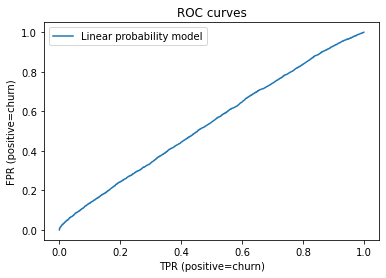

In [90]:
from sklearn.metrics import roc_curve, auc

df_train, df_test = model_selection.train_test_split(df_churn_copy, test_size=0.3)

y_col_name = 'churn_TF' 
x_col_name = ['age', 'weekly_consumption_hour', 'discount_price', 'male_TF', 'app_opens', 'cust_service_mssgs', 'num_videos_completed', 'num_videos_rated'] 

add_constant_TF = True

if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)
    
y_label = df_train['churn_TF'] 
y_pre = lpm_results.predict(df_train[x_col_name])

fpr, tpr, thersholds = roc_curve(list(y_label), list(y_pre))

roc_auc = auc(fpr, tpr)

plt.title('ROC curves')
plt.xlabel('TPR (positive=churn)')
plt.ylabel('FPR (positive=churn)')
plt.plot(fpr, tpr, '-', label='ROC (area = {0:.2f})'.format(roc_auc))

plt.legend(labels=['Linear probability model'])